特征矩阵形状: (1235, 5)
标签形状: (1235,)
训练集样本数: 988
测试集样本数: 247
=== 测试集误差指标 ===
MAE  = 0.069889
MSE  = 0.008524
RMSE = 0.092328
MAPE = 7.79%


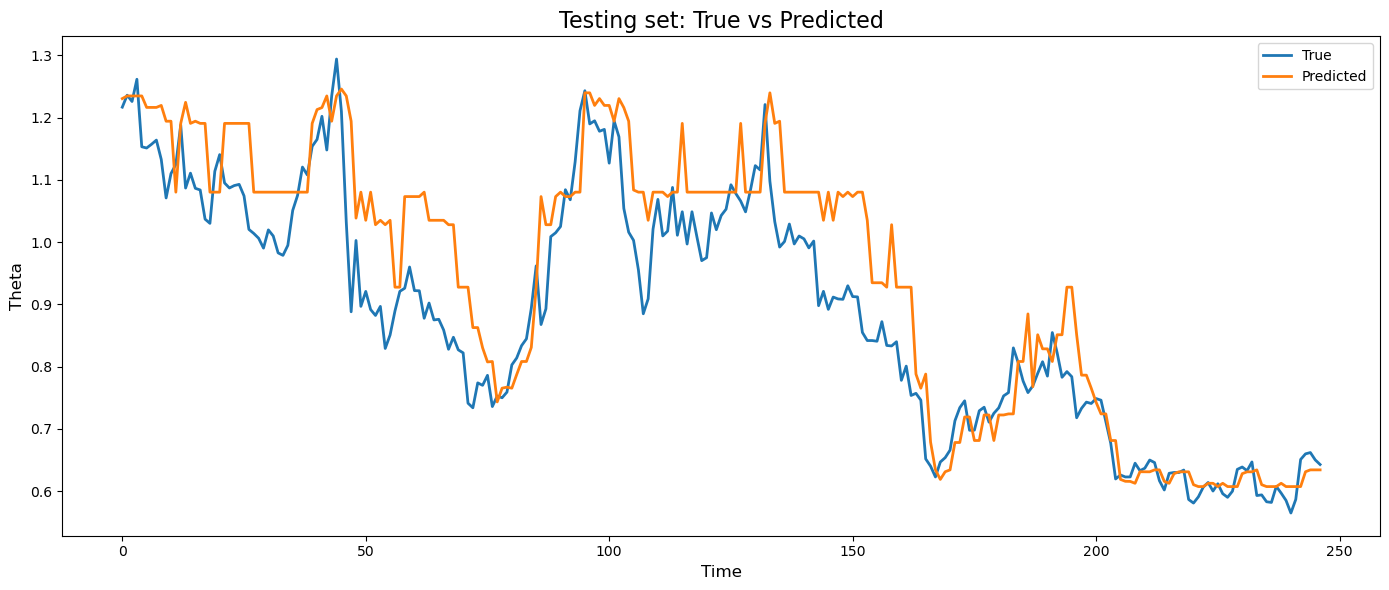

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_excel("data_token.xlsx")
df = df.sort_values("日期").reset_index(drop=True)
y_all = df["Theta"].values


def create_dataset_from_series(series, lag=5):
    X_list, y_list = [], []
    for i in range(lag, len(series)):
        X_list.append(series[i - lag:i])
        y_list.append(series[i])
    return np.array(X_list), np.array(y_list)
lag = 5  
X, y = create_dataset_from_series(y_all, lag=lag)
print("特征矩阵形状:", X.shape) 
print("标签形状:", y.shape)


n_samples = len(y)
n_train = int(n_samples * 0.8)
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test   = X[n_train:], y[n_train:]
print("训练集样本数:", X_train.shape[0])
print("测试集样本数:", X_test.shape[0])


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.06, 
    "max_depth": 4,
    "min_child_weight": 3,
    "subsample": 0.9,
    "colsample_bytree": 0.8,
    "gamma": 0.1,
    "reg_lambda": 2.0,
    "reg_alpha": 0.0,
}
num_round = 300  
model = xgb.train(params, dtrain, num_boost_round=num_round)


y_pred = model.predict(dtest)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

print("=== 测试集误差指标 ===")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAPE = {mape:.2f}%")


import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="True", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)
plt.title("Testing set: True vs Predicted", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

特征矩阵形状: (1235, 5)
标签形状: (1235,)
训练集: (988, 5)
测试集: (247, 5)
=== CatBoost 测试集误差 ===
MAE  = 0.077879
MSE  = 0.009510
RMSE = 0.097521
MAPE = 8.73%


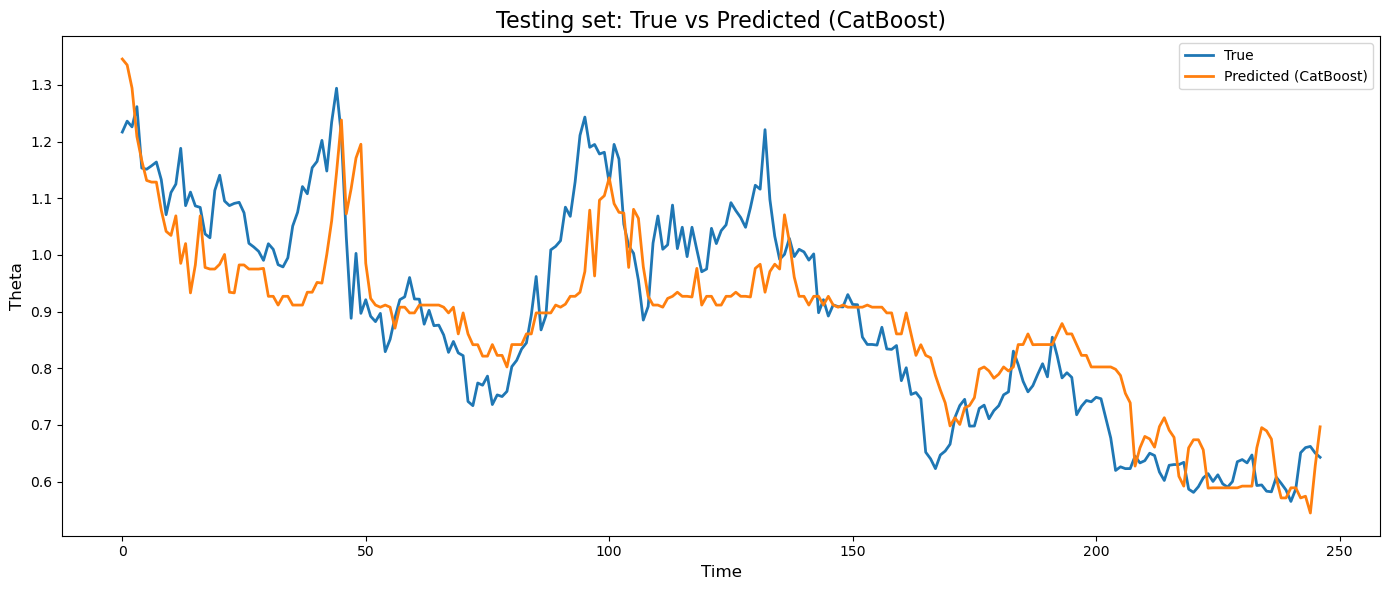

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_excel("data_token.xlsx")
df = df.sort_values("日期").reset_index(drop=True)
y_all = df["Theta"].values


def create_dataset_from_series(series, lag=5):
    X_list, y_list = [], []
    for i in range(lag, len(series)):
        X_list.append(series[i - lag:i])
        y_list.append(series[i])
    return np.array(X_list), np.array(y_list)
lag = 5
X, y = create_dataset_from_series(y_all, lag)
print("特征矩阵形状:", X.shape)
print("标签形状:", y.shape)


n_samples = len(y)
n_train = int(n_samples * 0.8)
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test   = X[n_train:], y[n_train:]
print("训练集:", X_train.shape)
print("测试集:", X_test.shape)


model = CatBoostRegressor(
    iterations=500,       
    learning_rate=0.05,
    depth=4,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
print("=== CatBoost 测试集误差 ===")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAPE = {mape:.2f}%")


plt.figure(figsize=(14, 6))
plt.plot(y_test, label="True", linewidth=2)
plt.plot(y_pred, label="Predicted (CatBoost)", linewidth=2)
plt.title("Testing set: True vs Predicted (CatBoost)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


特征矩阵形状: (1235, 5)
标签形状: (1235,)
训练集样本数: 988
测试集样本数: 247
=== 随机森林 测试集误差指标 ===
MAE  = 0.128311
MSE  = 0.025866
RMSE = 0.160829
MAPE = 13.88%


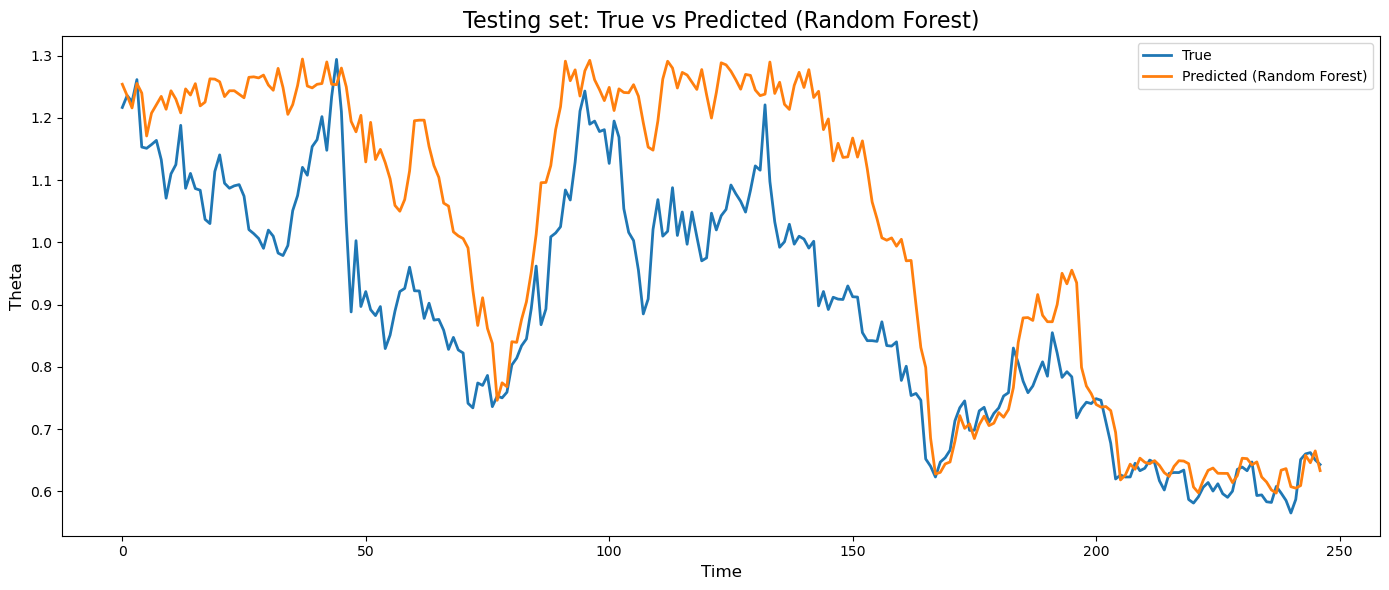

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_excel("data_token.xlsx")
df = df.sort_values("日期").reset_index(drop=True)
y_all = df["Theta"].values


def create_dataset_from_series(series, lag=5):
    X_list, y_list = [], []
    for i in range(lag, len(series)):
        X_list.append(series[i - lag:i])
        y_list.append(series[i])
    return np.array(X_list), np.array(y_list)
lag = 5  
X, y = create_dataset_from_series(y_all, lag=lag)

print("特征矩阵形状:", X.shape)
print("标签形状:", y.shape)


n_samples = len(y)
n_train = int(n_samples * 0.8)
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test   = X[n_train:], y[n_train:]
print("训练集样本数:", X_train.shape[0])
print("测试集样本数:", X_test.shape[0])


rf = RandomForestRegressor(
    n_estimators=500,     
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1        
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
epsilon = 1e-8 
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
print("=== 随机森林 测试集误差指标 ===")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAPE = {mape:.2f}%")


plt.style.use('default')
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="True", linewidth=2)
plt.plot(y_pred, label="Predicted (Random Forest)", linewidth=2)
plt.title("Testing set: True vs Predicted (Random Forest)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

特征矩阵形状: (1235, 5)
标签形状: (1235,)
训练集样本数: 988
测试集样本数: 247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 5
[LightGBM] [Info] Start training from score 1.973874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

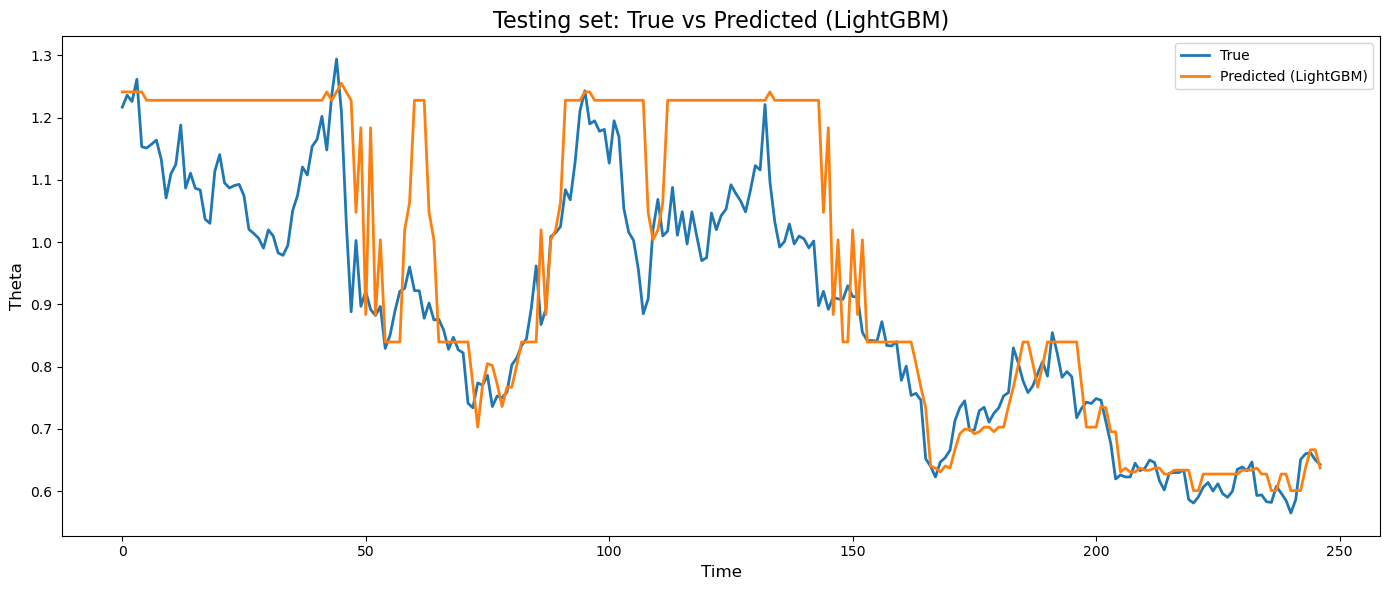

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_excel("data_token.xlsx")
df = df.sort_values("日期").reset_index(drop=True)
y_all = df["Theta"].values


def create_dataset_from_series(series, lag=5):
    X_list, y_list = [], []
    for i in range(lag, len(series)):
        X_list.append(series[i - lag:i])
        y_list.append(series[i])
    return np.array(X_list), np.array(y_list)
lag = 5  
X, y = create_dataset_from_series(y_all, lag=lag)

print("特征矩阵形状:", X.shape)
print("标签形状:", y.shape)


n_samples = len(y)
n_train = int(n_samples * 0.8)
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test   = X[n_train:], y[n_train:]
print("训练集样本数:", X_train.shape[0])
print("测试集样本数:", X_test.shape[0])


lgb_model = LGBMRegressor(
    n_estimators=500,      
    learning_rate=0.03,
    num_leaves=21,       
    max_depth=1,        
    subsample=0.9,        
    colsample_bytree=0.8, 
    reg_lambda=2.0,       
    reg_alpha=0.0,   
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train, y_train)


y_pred = lgb_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
print("=== LightGBM 测试集误差指标 ===")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAPE = {mape:.2f}%")


plt.style.use('default')
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="True", linewidth=2)
plt.plot(y_pred, label="Predicted (LightGBM)", linewidth=2)
plt.title("Testing set: True vs Predicted (LightGBM)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
